In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [64]:
%reload_ext autoreload
%autoreload 2

import lightgbm as lgb
import time

from src import utils, features
from datetime import datetime

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

basepath = os.path.expanduser('../')

## Helper

In [3]:
COLS_TO_REMOVE = ['SK_ID_CURR', 
                  'TARGET',
                  'OCCUPATION_TYPE__5',
                  'OCCUPATION_TYPE__-1',
                  'OCCUPATION_TYPE__11',
                  'OCCUPATION_TYPE__15',
                  'ORGANIZATION_TYPE__29',
                  'ORGANIZATION_TYPE__5',
                  'FLAG_OWN_REALTY',
                  'FLAG_DOCUMENT_21',
                  'ORGANIZATION_TYPE__21',
                  'FLAG_DOCUMENT_14',
                  'ORGANIZATION_TYPE__17',
                  'ORGANIZATION_TYPE__27',
                  'ORGANIZATION_TYPE__32',
                  'FLAG_DOCUMENT_16',
                  'ORGANIZATION_TYPE__47',
                  'FLAG_DOCUMENT_13',
                  'FLAG_DOCUMENT_11',
                  'ORGANIZATION_TYPE__40',
                  'ORGANIZATION_TYPE__23',
                  'ORGANIZATION_TYPE__14',
                  'diff_max_min_credit_term',
                  'ORGANIZATION_TYPE__1',
                  'ORGANIZATION_TYPE__9',
                  'OCCUPATION_TYPE__nan',
                  'ORGANIZATION_TYPE__41',
                  'OCCUPATION_TYPE__7',
                  'FLAG_MOBIL',
                  'ORGANIZATION_TYPE__18',
                  'ORGANIZATION_TYPE__38',
                  'ORGANIZATION_TYPE__44',
                  'FLAG_DOCUMENT_12',
                  'ORGANIZATION_TYPE__0',
                  'FLAG_DOCUMENT_2',
                  'ORGANIZATION_TYPE__13',
                  'OCCUPATION_TYPE__0',
                  'FLAG_DOCUMENT_4',
                  'OCCUPATION_TYPE__16',
                  'ORGANIZATION_TYPE__49',
                  'FLAG_DOCUMENT_6',
                  'FLAG_DOCUMENT_9',
                  'ORGANIZATION_TYPE__nan',
                  'OCCUPATION_TYPE__12',
                  'ORGANIZATION_TYPE__20',
                  'FLAG_CONT_MOBILE',
                  'ORGANIZATION_TYPE__37',
                  'ORGANIZATION_TYPE__45',
                  'FLAG_EMP_PHONE',
                  'FLAG_DOCUMENT_17',
                  'LIVE_REGION_NOT_WORK_REGION',
                  'OCCUPATION_TYPE__17',
                  'NAME_TYPE_SUITE',
                  'ORGANIZATION_TYPE__15',
                  'REG_REGION_NOT_LIVE_REGION',
                  'FLAG_DOCUMENT_10',
                  'ORGANIZATION_TYPE__3',
                  'OCCUPATION_TYPE__2',
                  'ORGANIZATION_TYPE__19',
                  'FLAG_DOCUMENT_19',
                  'AMT_REQ_CREDIT_BUREAU_DAY',
                  'credits_ended_bureau',
                  'ORGANIZATION_TYPE__8',
                  'ORGANIZATION_TYPE__16',
                  'FLAG_DOCUMENT_8',
                  'ORGANIZATION_TYPE__25',
                  'OCCUPATION_TYPE__6',
                  'NUM_NULLS_EXT_SCORES',
                  'ORGANIZATION_TYPE__48',
                  'ORGANIZATION_TYPE__53',
                  'ORGANIZATION_TYPE__10',
                  'FLAG_DOCUMENT_7',
                  'ORGANIZATION_TYPE__55',
                  'ORGANIZATION_TYPE__24',
                  'NAME_EDUCATION_TYPE__0',
                  'ORGANIZATION_TYPE__46',
                  'ELEVATORS_MODE',
                  'NAME_EDUCATION_TYPE__nan',
                  'ORGANIZATION_TYPE__22',
                  'ORGANIZATION_TYPE__50',
                  'REG_REGION_NOT_WORK_REGION',
                  'ORGANIZATION_TYPE__56',
                  'FLAG_DOCUMENT_5',
                  'FLAG_DOCUMENT_20',
                  'ORGANIZATION_TYPE__2',
                  'ORGANIZATION_TYPE__6',
                  'OCCUPATION_TYPE__13',
                  'ORGANIZATION_TYPE__52',
                  'FLAG_DOCUMENT_15',
                  'ORGANIZATION_TYPE__43',
                  'AMT_REQ_CREDIT_BUREAU_HOUR',
                  'NAME_HOUSING_TYPE',
                  'ORGANIZATION_TYPE__11',
                  'HOUSETYPE_MODE',
                  'EMERGENCYSTATE_MODE',
                  'ORGANIZATION_TYPE__28',
                  'NAME_EDUCATION_TYPE__2',
                  'ORGANIZATION_TYPE__4',
                  'OCCUPATION_TYPE__14',
                  'ORGANIZATION_TYPE__35',
                  'LIVE_CITY_NOT_WORK_CITY',
                  'num_diff_credits',
                  'ORGANIZATION_TYPE__51',
                  'REG_CITY_NOT_WORK_CITY',
                  'FLAG_EMAIL',
                  'ORGANIZATION_TYPE__57',
                  'NAME_HOUSING_TYPE__0',
                  'NAME_INCOME_TYPE__2',
                  'NAME_INCOME_TYPE__5',
                  'NAME_HOUSING_TYPE__nan',
                  'NAME_INCOME_TYPE__nan',
                  'NAME_INCOME_TYPE__0',
                  'NAME_INCOME_TYPE__6',
                  'NAME_CONTRACT_STATUS_3',
                  'NAME_INCOME_TYPE__3',
                  'diff_balance_curr_credit',
                  'ratio_min_installment_balance',
                  'NAME_HOUSING_TYPE__4',
                  'CODE_REJECT_REASON_5',
                  'CODE_REJECT_REASON_8',
                  'ORGANIZATION_TYPE__33',
                  'CODE_REJECT_REASON_0',
                  'OCCUPATION_TYPE__1',
                  'NAME_HOUSING_TYPE__5',
                  'sum_num_times_prolonged',
                  'NAME_GOODS_CATEGORY_13',
                  'NAME_GOODS_CATEGORY_4',
                  'NAME_GOODS_CATEGORY_26',
                  'PRODUCT_COMBINATION_-1',
                  'NAME_GOODS_CATEGORY_24',
                  'NAME_GOODS_CATEGORY_15',
                  'NAME_GOODS_CATEGORY_20',
                  'NAME_GOODS_CATEGORY_9',
                  'CODE_REJECT_REASON_6',
                  'NAME_GOODS_CATEGORY_6',
                  'NAME_GOODS_CATEGORY_0',
                  'num_high_int_no_info_loans',
                  'NAME_HOUSING_TYPE__2',
                  'NAME_GOODS_CATEGORY_14',
                  'NAME_GOODS_CATEGORY_17',
                  'PRODUCT_COMBINATION_16',
                  'PRODUCT_COMBINATION_15',
                  'OCCUPATION_TYPE__10',
                  'PRODUCT_COMBINATION_14',
                  'NAME_GOODS_CATEGORY_1',
                  'NAME_GOODS_CATEGORY_12',
                  'NAME_GOODS_CATEGORY_21',
                  'NAME_GOODS_CATEGORY_25',
                  'OCCUPATION_TYPE__9',
                  'NAME_GOODS_CATEGORY_10',
                  'NAME_GOODS_CATEGORY_16',
                  'NAME_GOODS_CATEGORY_8'
                ]

FREQ_ENCODING_COLS = ['ORGANIZATION_OCCUPATION',
                      'age_emp_categorical',
                      'age_occupation'
                     ]

ONE_HOT_COLS       = [
                      'ORGANIZATION_TYPE',
                      'OCCUPATION_TYPE',
                      'NAME_EDUCATION_TYPE',
                      'NAME_HOUSING_TYPE',
                      'NAME_INCOME_TYPE'
                     ]

## Data Preparation Process

## Process

1. Merge all datasets.
1. Do Feature Engineeering.
1. Create a sample.
1. Run cross-validation on sample.
1. Run model on training set and validate performance on holdout set.
1. For full training train model on full dataset and predict on test set.

In [4]:
def merge_datasets():
    """
    1. Need filenames of pickled training and test dataframes. 
    2. Merge all training pickled datasets.
    """
    
    filenames = ['application_',
                 'current_application_',
                 'bureau_',
                 'prev_app_',
                 'pos_cash_',
                 'credit_', 
                 'installments_',
                 'prev_app_bureau_', 
                 'prev_app_credit_', 
                 'prev_app_installments_',
                 'loan_stacking_',
                 'feature_groups_',
                 'prev_app_pos_cash_',
                 'prev_app_pos_cash_credit_bal_',
                 'prev_app_ohe_'
                ]
    
    # training dataframe
    train = []
    
    for filename in filenames:
        tmp = pd.read_pickle(os.path.join(basepath, f'data/interim/dataset1/{filename}train.pkl'))
        tmp.index = np.arange(len(tmp))
        
        train.append(tmp)
        
    # test dataframe
    test = []
    
    for filename in filenames:
        tmp = pd.read_pickle(os.path.join(basepath, f'data/interim/dataset1/{filename}test.pkl'))
        tmp.index = np.arange(len(tmp))
        
        test.append(tmp)
    
    return pd.concat(train, axis=1), pd.concat(test, axis=1)

In [36]:
%time train, test = merge_datasets()

CPU times: user 374 ms, sys: 244 ms, total: 618 ms
Wall time: 1.35 s


In [37]:
print('Training shape: {}'.format(train.shape))
print('Test shape: {}'.format(test.shape))

Training shape: (307511, 425)
Test shape: (48744, 425)


## Feature Engineering

In [22]:
# features to be implemented

def fe(train, test):
    # concat train and test
    ntrain     = len(train)
    data       = pd.concat((train, test))
    data.index = np.arange(len(data))

    del train, test
    gc.collect()
    
    for col in data.select_dtypes(include=['category']).columns:
        data[col] = data[col].cat.codes
    
    # concatenate OCCUPATION TYPE AND ORGANIZATION TYPE
    data.loc[:, 'ORGANIZATION_OCCUPATION'] = pd.factorize(data.ORGANIZATION_TYPE.astype(np.str) +\
                                                          data.OCCUPATION_TYPE.astype(np.str)
                                                         )[0]

    # interaction between total debt to income and (annuity / credit)
    data.loc[:, 'debt_income_to_annuity_credit'] = data.total_debt_to_income / data.ratio_annuity_credit

    # interaction between days birth and ratio of annuity to credit
    data.loc[:, 'add_days_birth_annuity_credit'] = data.DAYS_BIRTH + data.ratio_annuity_credit

    # interaction between ratio of annuity to credit with external source 2 score
    data.loc[:, 'mult_annuity_credit_ext_source_2']  = data.ratio_annuity_credit * data.EXT_SOURCE_2
    data.loc[:, 'ratio_annuity_credit_ext_source_2'] = data.ratio_annuity_credit / data.EXT_SOURCE_2.map(np.log1p)

    data.loc[:, 'mult_annuity_credit_ext_source_1']  = data.ratio_annuity_credit * data.EXT_SOURCE_1
    data.loc[:, 'ratio_annuity_credit_ext_source_1'] = data.ratio_annuity_credit / data.EXT_SOURCE_1.map(np.log1p)

    data.loc[:, 'mult_annuity_credit_ext_source_3']  = data.ratio_annuity_credit * data.EXT_SOURCE_3
    data.loc[:, 'ratio_annuity_credit_ext_source_3'] = data.ratio_annuity_credit / data.EXT_SOURCE_3.map(np.log1p)


    # interaction between ratio of annuity to credit with total amount paid in installments
    data.loc[:, 'mult_annuity_credit_amt_payment_sum'] = data.ratio_annuity_credit * data.AMT_PAYMENT_sum

    # interaction between total amount paid in installments and delay in installments
    data.loc[:, 'mult_amt_payment_sum_delay_installment'] = data.AMT_PAYMENT_sum * data.delay_in_installment_payments

    # interaction between credit / annuity and age
    data.loc[:, 'diff_credit_annuity_age'] = (data.AMT_CREDIT / data.AMT_ANNUITY) - (-data.DAYS_BIRTH / 365)

    # interaction between ext_3 and age
    data.loc[:, 'ext_3_age'] = data.EXT_SOURCE_3 * (-data.DAYS_BIRTH / 365)

    # interaction between ext_2 and age
    data.loc[:, 'ext_2_age'] = data.EXT_SOURCE_2 * (-data.DAYS_BIRTH / 365)

    # interaction between rate and external source 2
    data.loc[:, 'add_rate_ext_2'] = (data.AMT_CREDIT / data.AMT_ANNUITY) + data.EXT_SOURCE_2

    # interaction between rate and age
    data.loc[:, 'add_rate_age']  = (data.AMT_CREDIT / data.AMT_ANNUITY) + (-data.DAYS_BIRTH / 365)

    # interaction between age and employed and external score 2
    data.loc[:, 'add_mult_age_employed_ext_2'] = ((-data.DAYS_BIRTH / 365) +\
                                                 (-data.DAYS_EMPLOYED.replace({365243: np.nan}))) *\
                                                 (data.EXT_SOURCE_2)


    # combine ratio annuity credit, region populative relative and ext source 2
    data.loc[:, 'rate_annuity_region_ext_source_2'] = data.ratio_annuity_credit * data.REGION_POPULATION_RELATIVE * data.EXT_SOURCE_2    
    data.loc[:, 'region_ext_source_3'] = data.REGION_POPULATION_RELATIVE * data.EXT_SOURCE_3

    # Relationship between AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_YEAR
    data.loc[:, 'ratio_check_hour_to_year'] = data.AMT_REQ_CREDIT_BUREAU_HOUR.div(data.AMT_REQ_CREDIT_BUREAU_YEAR)

    # Relationship between Income and ratio annuity credit
    data.loc[:, 'mult_ratio_income'] = (data.ratio_annuity_credit * data.AMT_INCOME_TOTAL).map(np.log1p)
    data.loc[:, 'div_ratio_income']  = (data.AMT_INCOME_TOTAL / data.ratio_annuity_credit).map(np.log1p)

    # frequency encoding of some of the categorical variables.
    data = features.frequency_encoding(data, FREQ_ENCODING_COLS)
    
    # one hot encode columns
    data = features.one_hot_encoding(data, ONE_HOT_COLS)
    
    
    train = data.iloc[:ntrain]
    test  = data.iloc[ntrain:]
    
    del data
    gc.collect()
    
    train.index = np.arange(len(train))
    test.index  = np.arange(len(test))
    
    return train, test

In [38]:
%%time

train, test = fe(train, test)

CPU times: user 10.7 s, sys: 6.52 s, total: 17.3 s
Wall time: 17.3 s


In [39]:
print('Training shape: {}'.format(train.shape))
print('Validation shape: {}'.format(test.shape))

Training shape: (307511, 543)
Validation shape: (48744, 543)


### Always work with a sample.

In [25]:
np.random.seed(SEED)

ntrain    = int(.3 * len(train))
train_sub = train.sample(n=ntrain)

print('Size of sample: {}'.format(train_sub.shape))

Size of sample: (92253, 543)


In [26]:
columns = list(set(train_sub.columns) - set(COLS_TO_REMOVE))
X_train = train_sub.loc[:, columns]
y_train = train_sub.loc[:, 'TARGET']

### LightGBM

In [40]:
def do_cv(X_train, y_train, columns):    
    t0 = time.time()

    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': .1,
        'max_depth': 4,
        'num_leaves': 31,
        'sub_feature': .2,
        'sub_row': .8,
        'min_data_in_leaf': 40,
        'metric': 'auc',
        'nthread': 4,
        'verbose': -1,
        'seed': SEED
    }

    num_boost_round       = 1000
    early_stopping_rounds = 200

    ltrain = lgb.Dataset(X_train, y_train, feature_name=columns)
    cv     = lgb.cv(params, 
                    ltrain, 
                    num_boost_round=num_boost_round, 
                    early_stopping_rounds=early_stopping_rounds,
                    verbose_eval=20
                   )

    print('\nTook: {} seconds'.format(time.time() - t0))
    
    return pd.DataFrame(cv), params

In [35]:
cv_history, params = do_cv(X_train, y_train, columns)

[20]	cv_agg's auc: 0.73314 + 0.00445026
[40]	cv_agg's auc: 0.74056 + 0.00365013
[60]	cv_agg's auc: 0.74817 + 0.00380848
[80]	cv_agg's auc: 0.755947 + 0.00426864
[100]	cv_agg's auc: 0.76235 + 0.00417976
[120]	cv_agg's auc: 0.766761 + 0.00408082
[140]	cv_agg's auc: 0.769964 + 0.00409125
[160]	cv_agg's auc: 0.772041 + 0.00419334
[180]	cv_agg's auc: 0.773771 + 0.00419547
[200]	cv_agg's auc: 0.774944 + 0.00454893
[220]	cv_agg's auc: 0.776012 + 0.00442119
[240]	cv_agg's auc: 0.7769 + 0.00444848
[260]	cv_agg's auc: 0.777725 + 0.00437091
[280]	cv_agg's auc: 0.778112 + 0.00442363
[300]	cv_agg's auc: 0.778398 + 0.00436142
[320]	cv_agg's auc: 0.778723 + 0.00437253
[340]	cv_agg's auc: 0.779103 + 0.00442422
[360]	cv_agg's auc: 0.779306 + 0.00413835
[380]	cv_agg's auc: 0.779687 + 0.00398256
[400]	cv_agg's auc: 0.779898 + 0.00382513
[420]	cv_agg's auc: 0.780011 + 0.00387558
[440]	cv_agg's auc: 0.780173 + 0.00393211
[460]	cv_agg's auc: 0.780141 + 0.00395079
[480]	cv_agg's auc: 0.780082 + 0.00416374
[5

`[100]	cv_agg's auc: 0.774253 + 0.00431026`

In [14]:
def get_lgb_model(X_train, y_train, columns, params, num_boost_round):
    ltrain = lgb.Dataset(X_train, y_train, feature_name=columns)
    model  = lgb.train(params, ltrain, num_boost_round, valid_sets=[ltrain], valid_names=['train'], verbose_eval=20)
    
    return model

In [15]:
m = get_lgb_model(X_train, y_train, columns, params, num_boost_round=100)

[20]	train's auc: 0.768507
[40]	train's auc: 0.801448
[60]	train's auc: 0.826434
[80]	train's auc: 0.843991
[100]	train's auc: 0.858115


In [16]:
def feat_importance(feat_imp, columns): return pd.DataFrame({'feat': columns, 'imp': feat_imp}).sort_values(by='imp', ascending=False)
fi = feat_importance(m.feature_importance(), m.feature_name())

In [17]:
fi.iloc[:30]

,feat,imp
136,EXT_SOURCE_SUM,29
172,ratio_debt_credit_sum,28
24,EXT_3_2,22
319,EXT_2_3_mean,18
306,ratio_annuity_score_1,15
179,EXT_2_3_sum,15
243,ratio_annuity_income,15
321,ratio_goods_annuity,15
201,latest_credit,14
100,AMT_PAYMENT_sum,14


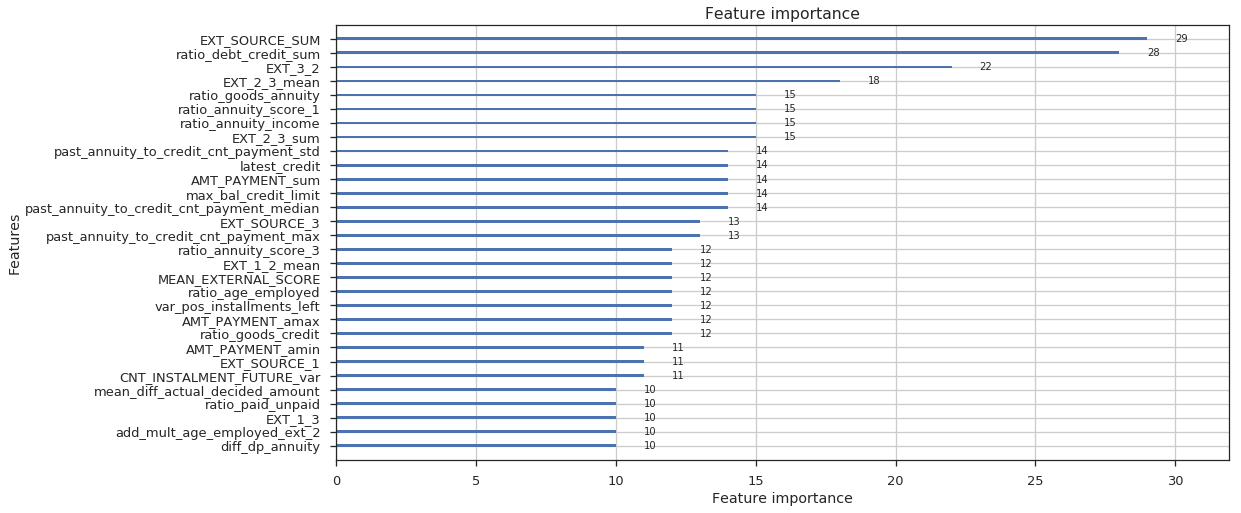

In [18]:
fig, ax = plt.subplots(1, figsize=(16, 8))
lgb.plot_importance(m, max_num_features=30, ax=ax);

## Full CV

In [61]:
def do_full_cv(X_train, y_train, columns):    
    t0 = time.time()

    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': .03,
        'max_depth': 3,
        'num_leaves': 40,
        'sub_feature': .1,
        'sub_row': .8,
        'min_data_in_leaf': 40,
        'metric': 'auc',
        'nthread': 4,
        'verbose': -1,
        'seed': SEED
    }

    num_boost_round       = 5000
    early_stopping_rounds = 100

    ltrain = lgb.Dataset(X_train, y_train, feature_name=columns)
    cv     = lgb.cv(params, 
                    ltrain, 
                    num_boost_round=num_boost_round, 
                    early_stopping_rounds=early_stopping_rounds,
                    verbose_eval=20
                   )

    print('\nTook: {} seconds'.format(time.time() - t0))
    
    return pd.DataFrame(cv), params

In [62]:
columns = list(set(train_sub.columns) - set(COLS_TO_REMOVE))
X_train = train.loc[:, columns]
y_train = train.loc[:, 'TARGET']

In [63]:
cv_history, params = do_full_cv(X_train, y_train, columns)

[20]	cv_agg's auc: 0.722619 + 0.0043206
[40]	cv_agg's auc: 0.729924 + 0.00416863
[60]	cv_agg's auc: 0.732076 + 0.00399039
[80]	cv_agg's auc: 0.740231 + 0.0038508
[100]	cv_agg's auc: 0.744339 + 0.00354359
[120]	cv_agg's auc: 0.748088 + 0.00335666
[140]	cv_agg's auc: 0.752754 + 0.00333385
[160]	cv_agg's auc: 0.756271 + 0.00333787
[180]	cv_agg's auc: 0.759642 + 0.0033596
[200]	cv_agg's auc: 0.762627 + 0.00319646
[220]	cv_agg's auc: 0.765047 + 0.00322761
[240]	cv_agg's auc: 0.767242 + 0.00328618
[260]	cv_agg's auc: 0.768988 + 0.00328505
[280]	cv_agg's auc: 0.770649 + 0.00316369
[300]	cv_agg's auc: 0.771927 + 0.0031811
[320]	cv_agg's auc: 0.773216 + 0.00312625
[340]	cv_agg's auc: 0.77427 + 0.00314964
[360]	cv_agg's auc: 0.775302 + 0.00308189
[380]	cv_agg's auc: 0.776202 + 0.00310177
[400]	cv_agg's auc: 0.776902 + 0.00303943
[420]	cv_agg's auc: 0.777589 + 0.00302218
[440]	cv_agg's auc: 0.778312 + 0.00292341
[460]	cv_agg's auc: 0.77896 + 0.00288989
[480]	cv_agg's auc: 0.779537 + 0.00289129
[5

[3880]	cv_agg's auc: 0.794141 + 0.00242906
[3900]	cv_agg's auc: 0.794125 + 0.00243217
[3920]	cv_agg's auc: 0.79414 + 0.00244786
[3940]	cv_agg's auc: 0.794141 + 0.00243818
[3960]	cv_agg's auc: 0.794128 + 0.00243295

Took: 3236.321000814438 seconds


`643	0.791395	0.002156`

## Training ( Holdout )

In [ ]:
columns = list(set(train_sub.columns) - set(COLS_TO_REMOVE))

X_train, X_val, y_train, y_val = train_test_split(train, 
                                                  train.TARGET, 
                                                  test_size=.3, 
                                                  random_state=SEED)

In [ ]:
t0 = time.time()

params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': (.03 / 1.2),
        'max_depth': 3,
        'num_leaves': 40,
        'sub_feature': .1,
        'sub_row': .8,
        'min_data_in_leaf': 40,
        'metric': 'auc',
        'nthread': 4,
        'verbose': -1,
        'seed': SEED
    }

num_boost_round = int(3960 * 1.2)

ltrain     = lgb.Dataset(X_train, y_train, feature_name=columns)
m          = lgb.train(params, ltrain, num_boost_round)
hold_preds = m.predict(X_val)

print('ROC AUC Score: {}'.format(roc_auc_score(y_val, hold_preds)))

## Full Training

In [65]:
t0 = time.time()

params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'learning_rate': (.03 / 1.2),
        'max_depth': 3,
        'num_leaves': 40,
        'sub_feature': .1,
        'sub_row': .8,
        'min_data_in_leaf': 40,
        'metric': 'auc',
        'nthread': 4,
        'verbose': -1,
        'seed': SEED
    }

num_boost_round = int(3960 * 1.2)

X = train.loc[:, columns]
y = train.loc[:, 'TARGET']

Xtest = test.loc[:, columns]

ltrain = lgb.Dataset(X, y, feature_name=columns)
m      = lgb.train(params, ltrain, num_boost_round)
preds  = m.predict(Xtest)

sub_identifier = "%s-%s-%.5f" % (datetime.now().strftime('%Y%m%d-%H%M'), 'v62', .7941)

sub            = pd.read_csv(os.path.join(basepath, 'data/raw/sample_submission.csv.zip'))
sub['TARGET']  = preds

sub.to_csv(os.path.join(basepath, 'submissions/%s.csv'%(sub_identifier)), index=False)

print('\n Took: {} seconds'.format(time.time() - t0))


 Took: 1081.6441006660461 seconds
